# Present the symbolic derivation of existing models

In [ ]:
%matplotlib widget
import os, importlib, inspect
from IPython.display import display, Math, Latex, Markdown
from bmcs_matmod.gsm_lagrange.core.gsm_def import GSMDef, sp
from bmcs_matmod.gsm_lagrange.core.gsm_model import GSMModel
from bmcs_matmod.gsm_lagrange.core.gsm_def_registry import list_gsm_defs
import numpy as np
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'bmcs_matmod.gsm_lagrange.gsm_def'

In [ ]:
# Import the GSM definition registry  
from bmcs_matmod.gsm_lagrange.gsm_def_registry import get_gsm_defs

gsm_models = get_gsm_defs()

# Display available GSM definitions
print("Available GSM Definitions:")
print("=" * 50)
for i, (key, gsm_def_class) in enumerate(gsm_models.items(), 1):
    if key.startswith('GSM1D_'):  # Show only full class names
        print(f"{i:2d}. {key} -> {gsm_def_class}")

print(f"\nTotal access keys: {len(gsm_models)}")
print(f"Unique definitions: {len(set(gsm_models.values()))}")

ImportError: cannot import name 'get_gsm_models' from 'bmcs_matmod.gsm_lagrange.gsm_def_registry_new' (/home/rch/Coding/bmcs_matmod/bmcs_matmod/gsm_lagrange/gsm_def_registry_new.py)

In [4]:
mparams = dict(E = 20, K = 5, S = 2, c = 1, r = 1, eps_0 = 0, f_c = 15, eta_vp=10, eta_ve=100)

In [5]:
n_t = 151
n_I = 1
eps_max = 2.5
final_time = 10
t_t = np.linspace(0, final_time, n_t)
eps_n_t = np.linspace(0, eps_max, n_t)
response = {}
selection = [] # ['GSM1D_VEVP', 'GSM1D_VEVPD']
if len(selection) == 0:
    selection = gsm_models.keys()
for name in selection:
    gsm = gsm_models[name]
    gsm.set_params(**mparams)
    print(f'name: {name}')
    response[name] = gsm.get_F_response(eps_n_t, t_t)

name: GSM1D_ED
name: GSM1D_EP
name: GSM1D_EPD
name: GSM1D_EVP
name: GSM1D_EVPD
name: GSM1D_VE
name: GSM1D_VED
name: GSM1D_VEVP
name: GSM1D_VEVPD


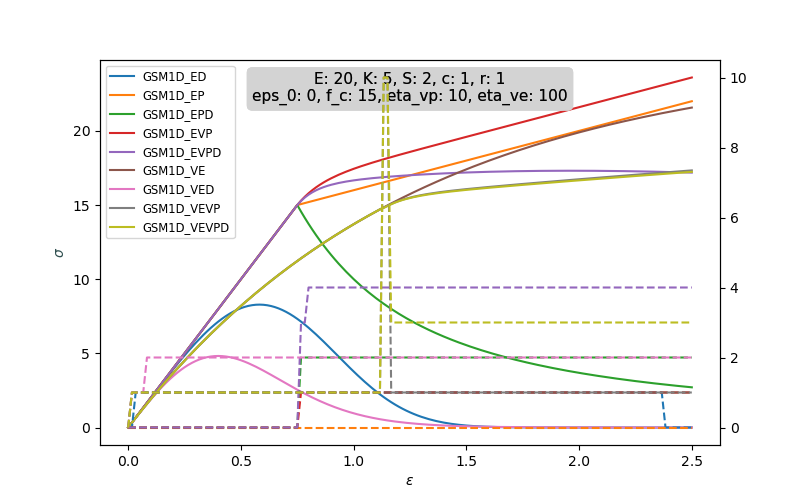

In [6]:
fig, ax_sig = plt.subplots(1, 1, figsize=(8, 5))

ax_iter = ax_sig.twinx()

for name, rd in response.items():
    eps_t = rd.eps_t[:, 0]
    iter_t = rd.iter_t[:, 0]
    sig_t = rd.sig_t[:, 0, 0]
    ax_sig.plot(eps_t, sig_t, label=rf'{name}')
    ax_iter.plot(eps_t, iter_t, label=rf'{name}', ls='dashed')
    # Add a box with the material parameters
    param_text = ', '.join([f'{key}: {value}' for key, value in mparams.items()])
    param_text = '\n'.join([', '.join(param_text.split(', ')[i:i+5]) for i in range(0, len(param_text.split(', ')), 5)])
    props = dict(boxstyle='round', facecolor='lightgray', edgecolor='lightgray', alpha=0.5)
    ax_sig.text(0.5, 0.97, param_text, transform=ax_sig.transAxes, fontsize=11,
                verticalalignment='top', horizontalalignment='center', bbox=props)
ax_sig.set_ylabel(r'$\sigma$', color='darkslategray')
ax_sig.set_xlabel(r'$\varepsilon$')
ax_sig.legend(fontsize='small')


In [7]:
mparams = dict(E = 20, K = 10, S = .2, c = 1, r = 1, eps_0 = 0, f_c = 7, eta_vp=10, eta_ve=10)

n_t = 151
n_I = 1
sig_max = 16
final_time = 30
t_t = np.linspace(0, final_time, n_t)
sig_n_t = np.linspace(0, sig_max, n_t)
response = {}
selection = ['GSM1D_EVPD', 'GSM1D_VEVP', 'GSM1D_VEVPD']
if len(selection) == 0:
    selection = gsm_models.keys()
for name in selection:
    gsm = gsm_models[name]
    gsm.set_params(**mparams)
    print(f'name: {name}')
    response[name] = gsm.get_G_response(sig_n_t, t_t)

name: GSM1D_EVPD
name: GSM1D_VEVP
name: GSM1D_VEVPD


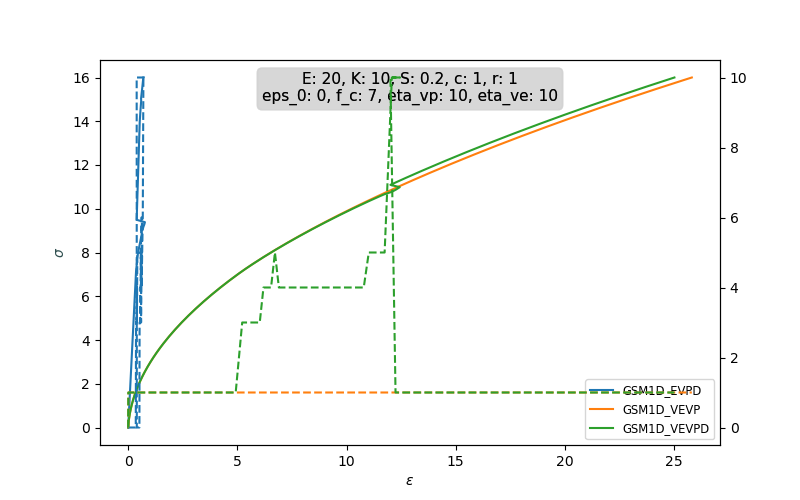

In [9]:
fig, ax_sig = plt.subplots(1, 1, figsize=(8, 5))

ax_iter = ax_sig.twinx()

for name, rd in response.items():
    eps_t = rd.eps_t[:, 0]
    iter_t = rd.iter_t[:, 0]
    sig_t = rd.sig_t[:, 0]
    ax_sig.plot(eps_t, sig_t, label=rf'{name}')
    ax_iter.plot(eps_t, iter_t, label=rf'{name}', ls='dashed')
    # Add a box with the material parameters
    param_text = ', '.join([f'{key}: {value}' for key, value in mparams.items()])
    param_text = '\n'.join([', '.join(param_text.split(', ')[i:i+5]) for i in range(0, len(param_text.split(', ')), 5)])
    props = dict(boxstyle='round', facecolor='lightgray', edgecolor='lightgray', alpha=0.5)
    ax_sig.text(0.5, 0.97, param_text, transform=ax_sig.transAxes, fontsize=11,
                verticalalignment='top', horizontalalignment='center', bbox=props)
ax_sig.set_ylabel(r'$\sigma$', color='darkslategray')
ax_sig.set_xlabel(r'$\varepsilon$')
ax_sig.legend(fontsize='small')
